# Undistort Dataset

In [1]:
class Args:
    uncalibrated_dataset_path = "../../resources/images/uncalibrated/calibration_dataset.npz"
    calibrated_dataset_path = "../../resources/images/calibrated/dataset_1.npz"
    calibration_matrix_path = "../../resources/calibrations/calibration.yml"
    save_calibrated_images = False
args = Args()

In [2]:
from models.dataset.DatasetHelper import openImageDataset, saveImageDataset, load_coefficients
from models.dataset.undistort import undistort_images

In [3]:
# Open Dataset and calibration file
rs_rgb, rs_z, zv_rgb, zv_z = openImageDataset(args.uncalibrated_dataset_path)
print(f"Opened dataset containing {len(rs_rgb)} image sets")

## Load Coefficients
transformation_matrix = load_coefficients(path=args.calibration_matrix_path)
print(f"Transformation matrix loaded:\n{transformation_matrix}")

## Undistort Images
zv_undistort_z, zv_undistort_rgb = undistort_images(zv_z, zv_rgb, transformation_matrix)
print(f"undistorted zivid images (shape: {zv_undistort_z.shape})")

## save image dataset
if args.save_calibrated_images:
    saveImageDataset(
        args.calibrated_dataset_path,
        rs_rgb,
        rs_z,
        zv_undistort_rgb,
        zv_undistort_z
    )
    print(f"saved undistorted images in {args.calibrated_dataset_path}")

Opened dataset containing 24 image sets
Transformation matrix loaded:
[[ 9.85694168e-01  1.62607245e-02 -1.54242802e-01  3.25331442e+01]
 [-1.66598873e-02  9.97242500e-01 -2.26440930e-03 -4.13724632e+01]
 [ 1.54579174e-01  4.40083588e-03  9.87294301e-01  3.37779913e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
undistorted zivid images (shape: (24, 1247, 1934))


<Figure size 432x288 with 0 Axes>

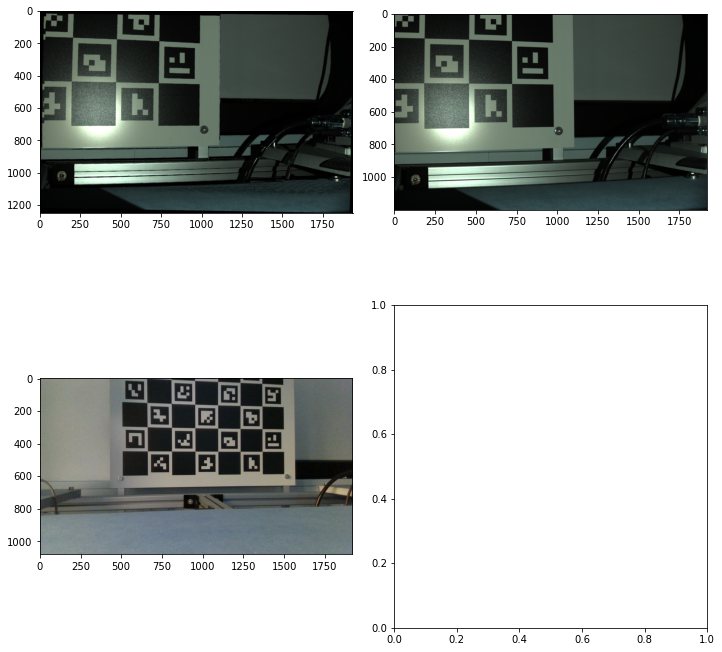

In [ ]:
from matplotlib import pyplot as plt

plt.figure()
f, axarr = plt.subplots(2, 2, figsize=(10, 10))
f.tight_layout()
axarr[0][0].imshow(zv_undistort_rgb[0])
axarr[0][1].imshow(zv_rgb[0])
axarr[1][0].imshow(rs_rgb[0])